### <b> Heart Disease Prediction </b>

#### Table of contents
* [Context](#1)
* [About Dataset](#2)
* [Importing the Dependecies](#3)
* [Data Loading](#4)
* [Data Preprocessing](#5)
    * [Exploratory Data Analysis](#6)
    * [Outlier Detection](#7)
    * [Correlation-Matrix](#8)
* [Data Splitting, Scaling](#9)
* [Model Building/ Evaluation](#10)
* [Hyperparameter Tuning (Random Search)](#11)
* [Final Model & ROC Plot](#12)
* [Model Saving](#13)
* [Predictive System](#14)
* [Conclusion](#15)


#### <b> <a id='1' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Context</a><b>
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

#### <b> <a id='2' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>About Dataset</a><b>

| Feature                                           | Description                                                                       |
|---------------------------------------------------|-----------------------------------------------------------------------------------|
| Age                                               | Age of the individual                                                             |
| Sex                                               | Sex of the individual (0 = Female, 1 = Male)                                      |
| Chest Pain Type (4 Values)                       | Type of chest pain experienced (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic) |
| Resting Blood Pressure                           | Resting blood pressure in mm Hg                                                    |
| Serum Cholesterol (mg/dL)                        | Serum cholesterol level in mg/dL                                                   |
| Fasting Blood Sugar (> 120 mg/dL)                | Fasting blood sugar level (0 = <= 120 mg/dL, 1 = > 120 mg/dL)                      |
| Resting Electrocardiographic Results (Values 0, 1, 2) | Resting electrocardiographic results (0 = Normal, 1 = Abnormal, 2 = Left Ventricular Hypertrophy) |
| Maximum Heart Rate Achieved                      | Maximum heart rate achieved during exercise                                        |
| Exercise-Induced Angina                          | Presence of exercise-induced angina (0 = No, 1 = Yes)                              |
| Oldpeak (ST Depression Induced by Exercise Relative to Rest) | ST depression induced by exercise relative to rest                           |
| Slope of the Peak Exercise ST Segment            | Slope of t
| Target: 0=No: 1=Yes | Detected Heart Disease


#### <b> <a id='3' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Importing the Dependecies</a><b>

In [195]:
#data manipulation and plotting
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme('notebook')
import matplotlib.pyplot as plt

#data preprocessing and model building
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#evaluation
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix


import warnings as w
w.filterwarnings('ignore')

#### <b> <a id='4' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Data Loading</a><b>

In [2]:
import os

train_data= None

for dirname, _, filenames in os.walk('../dataset/'):
    for file in filenames:
        path = os.path.join(dirname, file)

        train_data= pd.read_csv(path)
    

In [3]:
#displaying the first 5 rows
train_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### <b> <a id='5' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Data Preprocessing</a><b>

In [4]:
#checking the number of rows and columns
print(f'The Data has {train_data.shape[1]} Features/Attributes and {train_data.shape[0]} Observations/Rows ')

The Data has 12 Features/Attributes and 918 Observations/Rows 


In [5]:
#general info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#checkinf for missing values
train_data[train_data.isna().any(axis=1)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [7]:
#checking for dupliacte values
train_data.duplicated().sum()

0

In [8]:
#overall statistics
train_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
#displaying the Features names
train_data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

#### <b> <a id='6' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Exploratory Data Analysis</a><b>

In [10]:
#checking the value counts for each features
for idx, val in enumerate(train_data.columns.tolist()):

    if train_data[val].nunique() <= 4:
        print(f'{val}')
              
        print(train_data[val].value_counts())
        print('---'*20)
        print('\n')

print('Complete', '--'*100)


Sex
Sex
M    725
F    193
Name: count, dtype: int64
------------------------------------------------------------


ChestPainType
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
------------------------------------------------------------


FastingBS
FastingBS
0    704
1    214
Name: count, dtype: int64
------------------------------------------------------------


RestingECG
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
------------------------------------------------------------


ExerciseAngina
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
------------------------------------------------------------


ST_Slope
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
------------------------------------------------------------


HeartDisease
HeartDisease
1    508
0    410
Name: count, dtype: int64
------------------------------------------------------------


Complete ----------------------

In [13]:
#helper function
def dist_plot(col_list):
    plt.figure(figsize=(15,9))

    colors =  ['#8e0201', '#e8cccc']

    for idx, col in enumerate(col_list):
        plt.subplot(3,3,idx+1)

        sns.distplot(
            x= train_data[col],
            color=colors[0]
        )

        plt.title(f'{col} Distribution Plot')
        plt.tight_layout(w_pad=0.5, h_pad=0.5)
    plt.show()



def count_plot(col_list):

    plt.figure(figsize=(15,15))

    colors = ['#8e0201', '#e8cccc', '#c2211a']

    for idx, col in enumerate(col_list):
        plt.subplot(3,3, idx+1)

        sns.countplot(
            x=train_data[col],
            palette=colors
        )
        plt.title(f'{col} Category')
        plt.tight_layout(w_pad=0.5, h_pad=1.5)
        plt.xlabel(f'{col}', fontsize=16)
        plt.xticks(rotation=45)
    plt.show()        


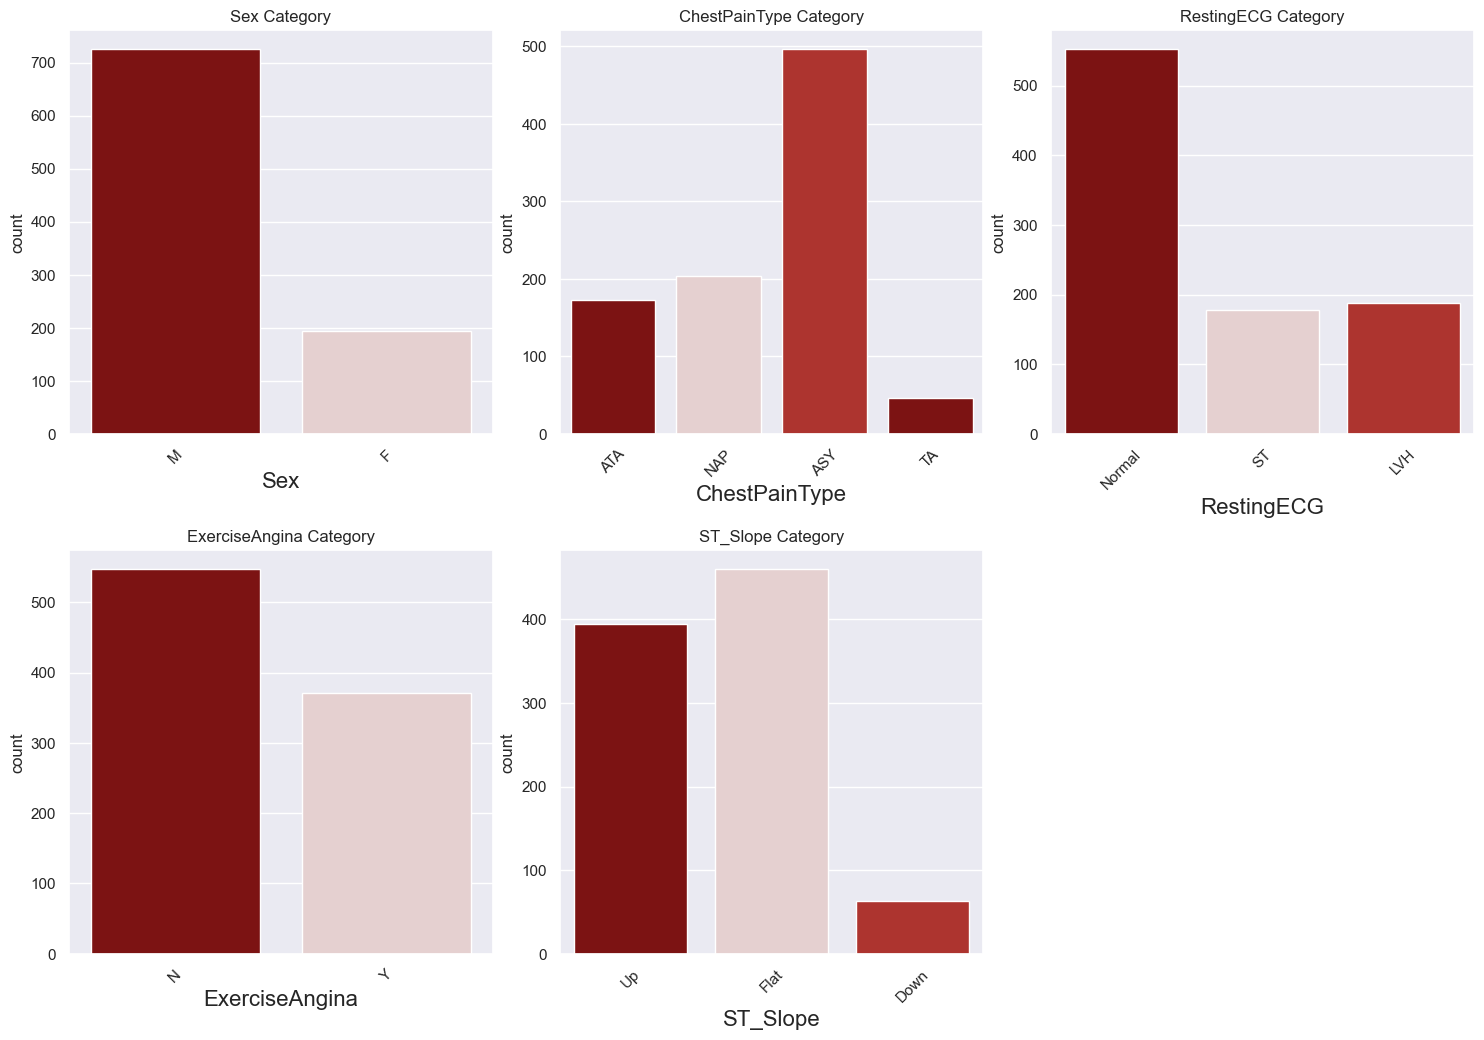

In [14]:
#selecting categorical columns
cat_cols = train_data.select_dtypes(exclude=np.number).columns.to_list()

#plot the countplot
count_plot(cat_cols)

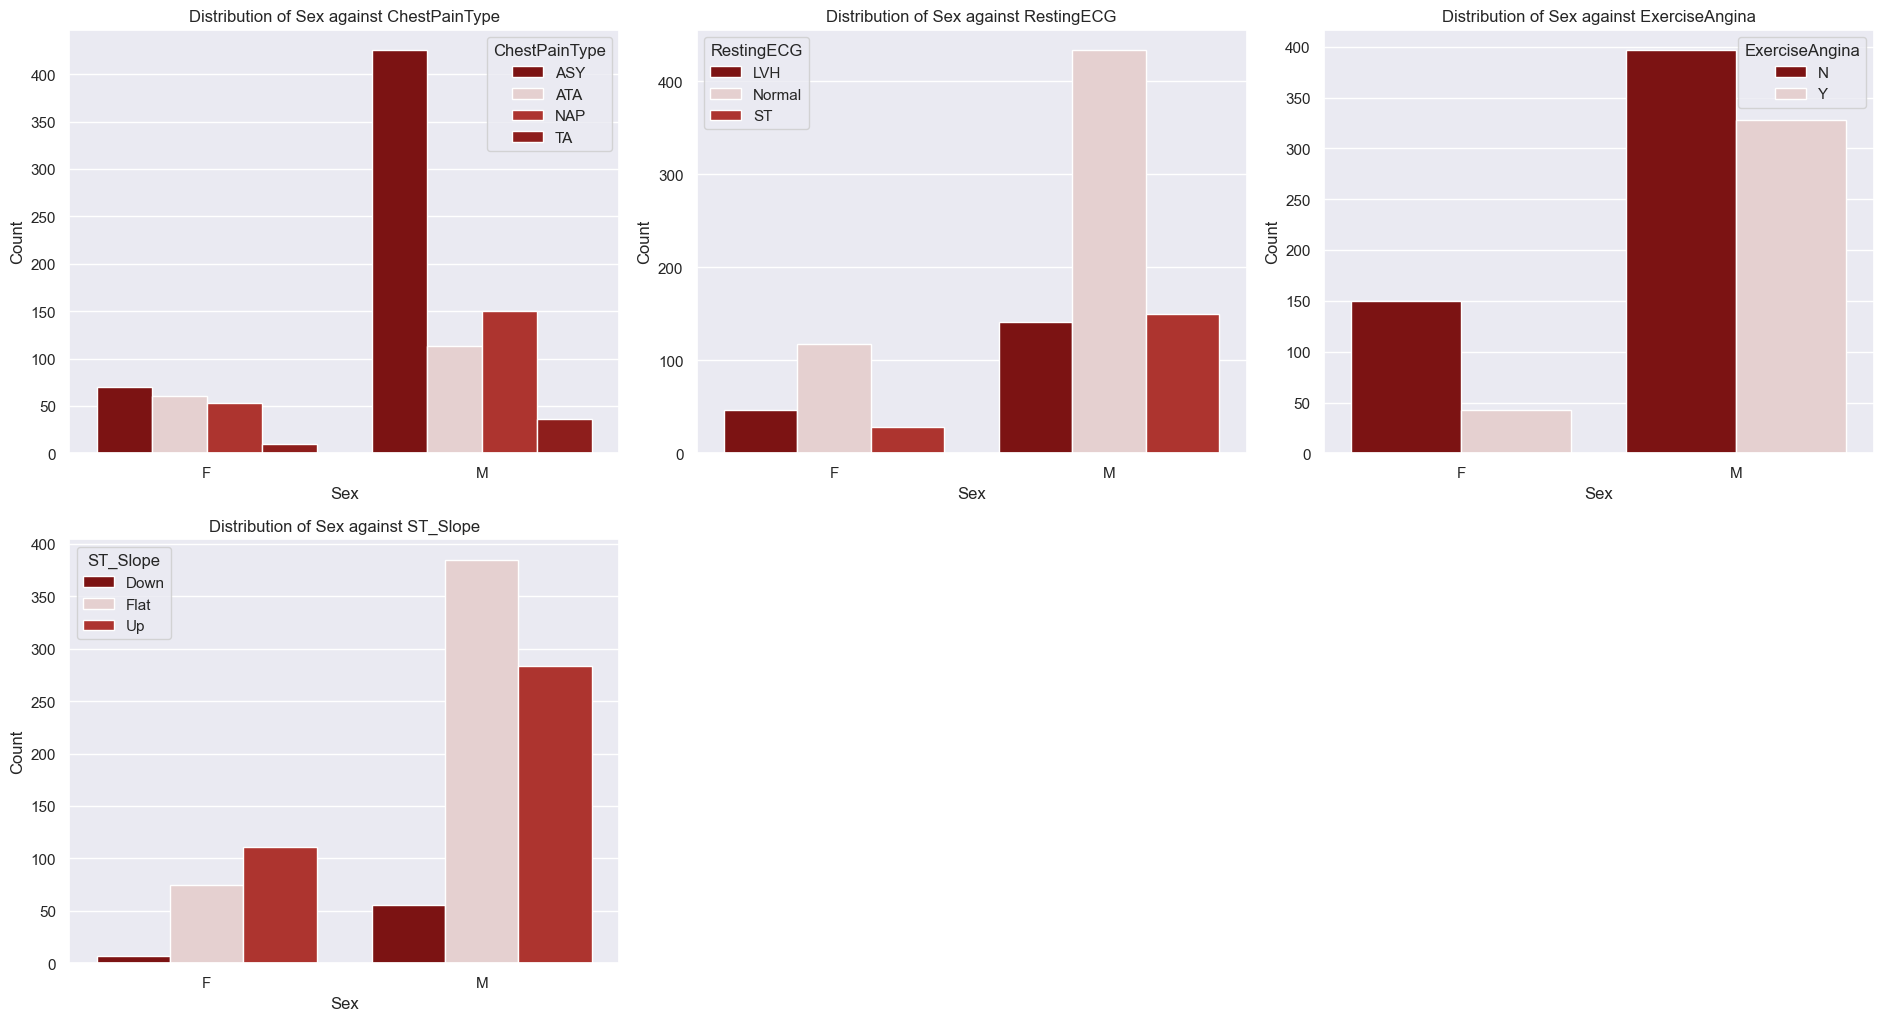

In [15]:
## Visualization Based on Gender

#helper function
def group_plot(x, data):
    plt.figure(figsize=(19, 15))
    columns = train_data.select_dtypes(exclude=np.number).columns.tolist()
    columns.remove('Sex')
    
    for idx, col in enumerate(columns):
        colors = ['#8e0201','#e8cccc', '#c2211a',  '#a10c09', '#d32b22', '#e4352b']
        grouped_data = data.groupby([x, col]).size().reset_index(name='count')
        plt.subplot(3,3, idx + 1)
        sns.barplot(data=grouped_data, x=x, y='count', hue=col, palette=colors)
        plt.title(f'Distribution of {x} against {col}')
        plt.xlabel(x)
        plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

#displaying the countplot against gender
group_plot(x='Sex', data=train_data)

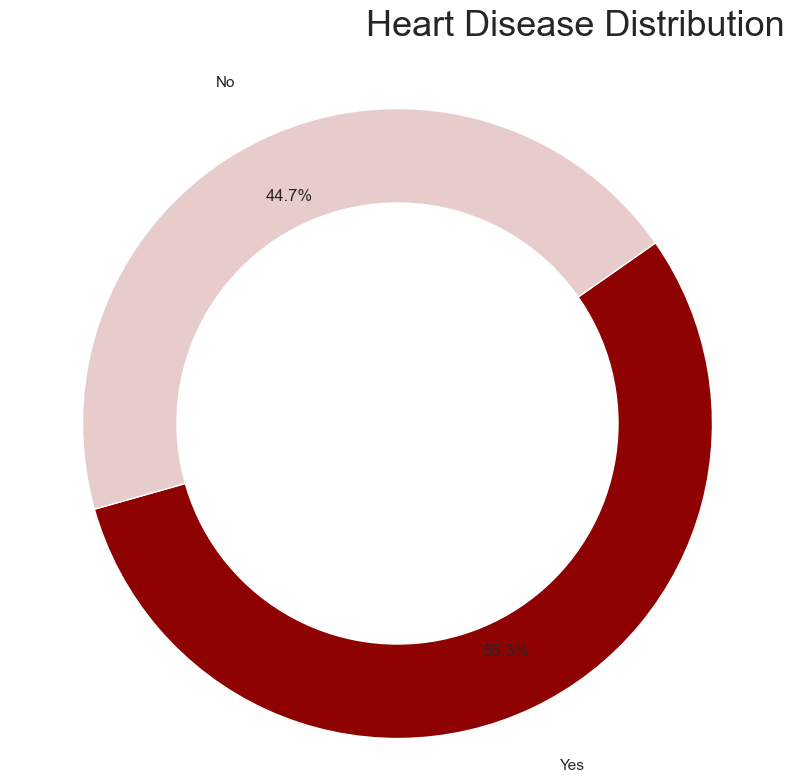

In [16]:
#target class
counts = train_data['HeartDisease'].value_counts(normalize=True) *100
labels= ['Yes', 'No']

colors =  ['#8e0201', '#e8cccc']

plt.figure(figsize=(10,9))

#plotting a pie chart
wedges, texts, autotexts = plt.pie(counts, colors=colors, startangle=35, counterclock=False, autopct='%1.1f%%',
                                  pctdistance=0.8, labeldistance=1.2, labels=labels)

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)

# Set title and equal aspect ratio
plt.title('Heart Disease Distribution', fontsize=26, loc='right', pad=30)
plt.axis('equal')



plt.show()

Inferences:
1. The Target Feature is showing somewhat of a class balance.

In [43]:
#selecting numerical columns
num_cols = train_data.select_dtypes(exclude='object').columns.to_list()

for idx, col in enumerate(num_cols):
    
    print(f'For {col.upper()}')
    print(
        train_data[col].describe()
    )
    print('---'*20)
    print('\n')

For AGE
count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64
------------------------------------------------------------


For RESTINGBP
count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64
------------------------------------------------------------


For CHOLESTEROL
count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64
------------------------------------------------------------


For FASTINGBS
count    918.000000
mean       0.233115
std        0.423046
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FastingBS, dtype: flo

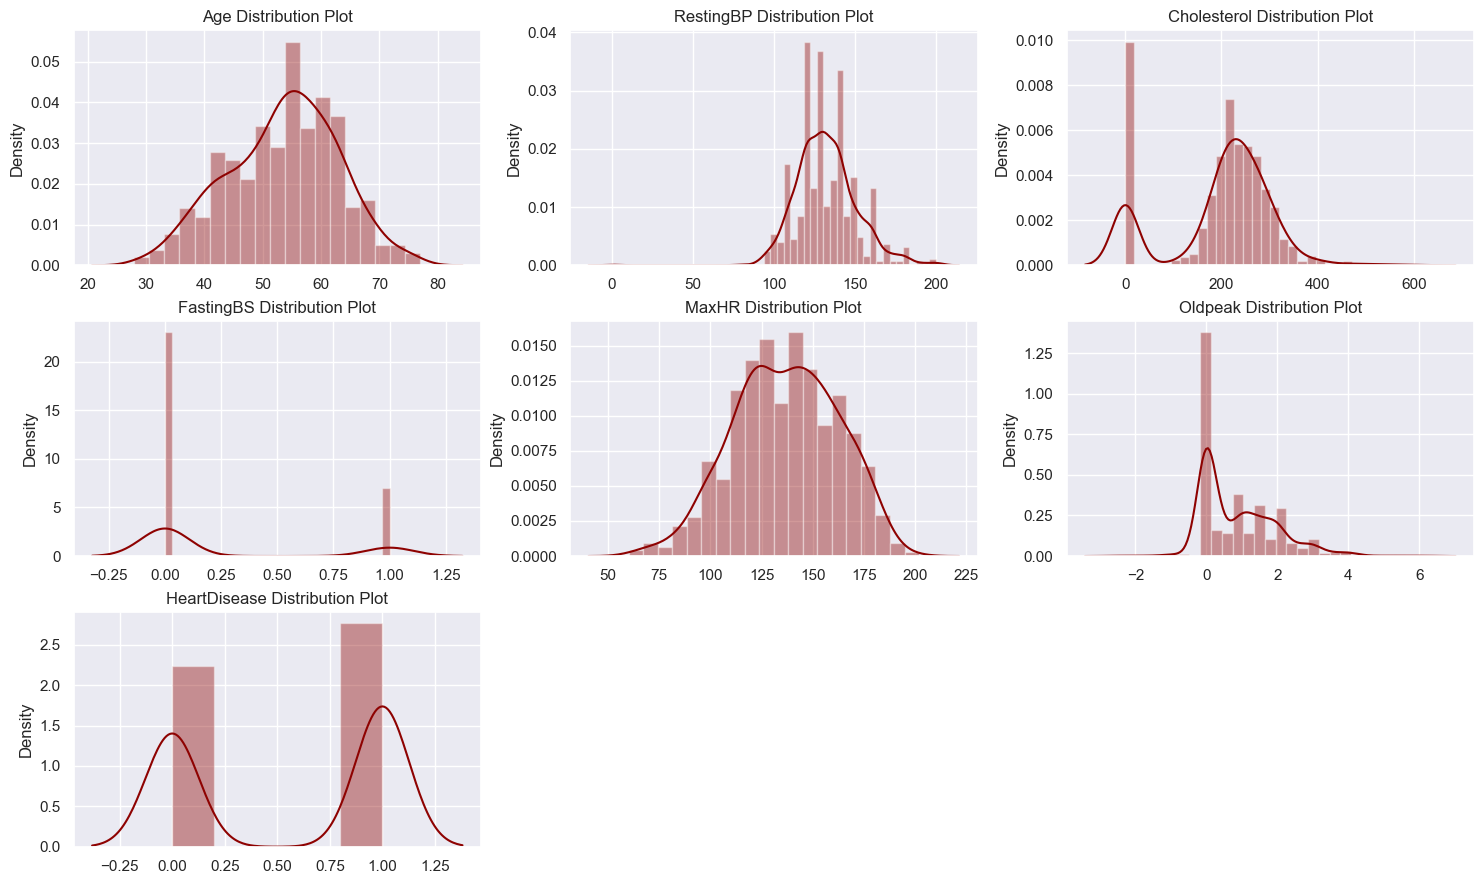

In [44]:
dist_plot(num_cols)

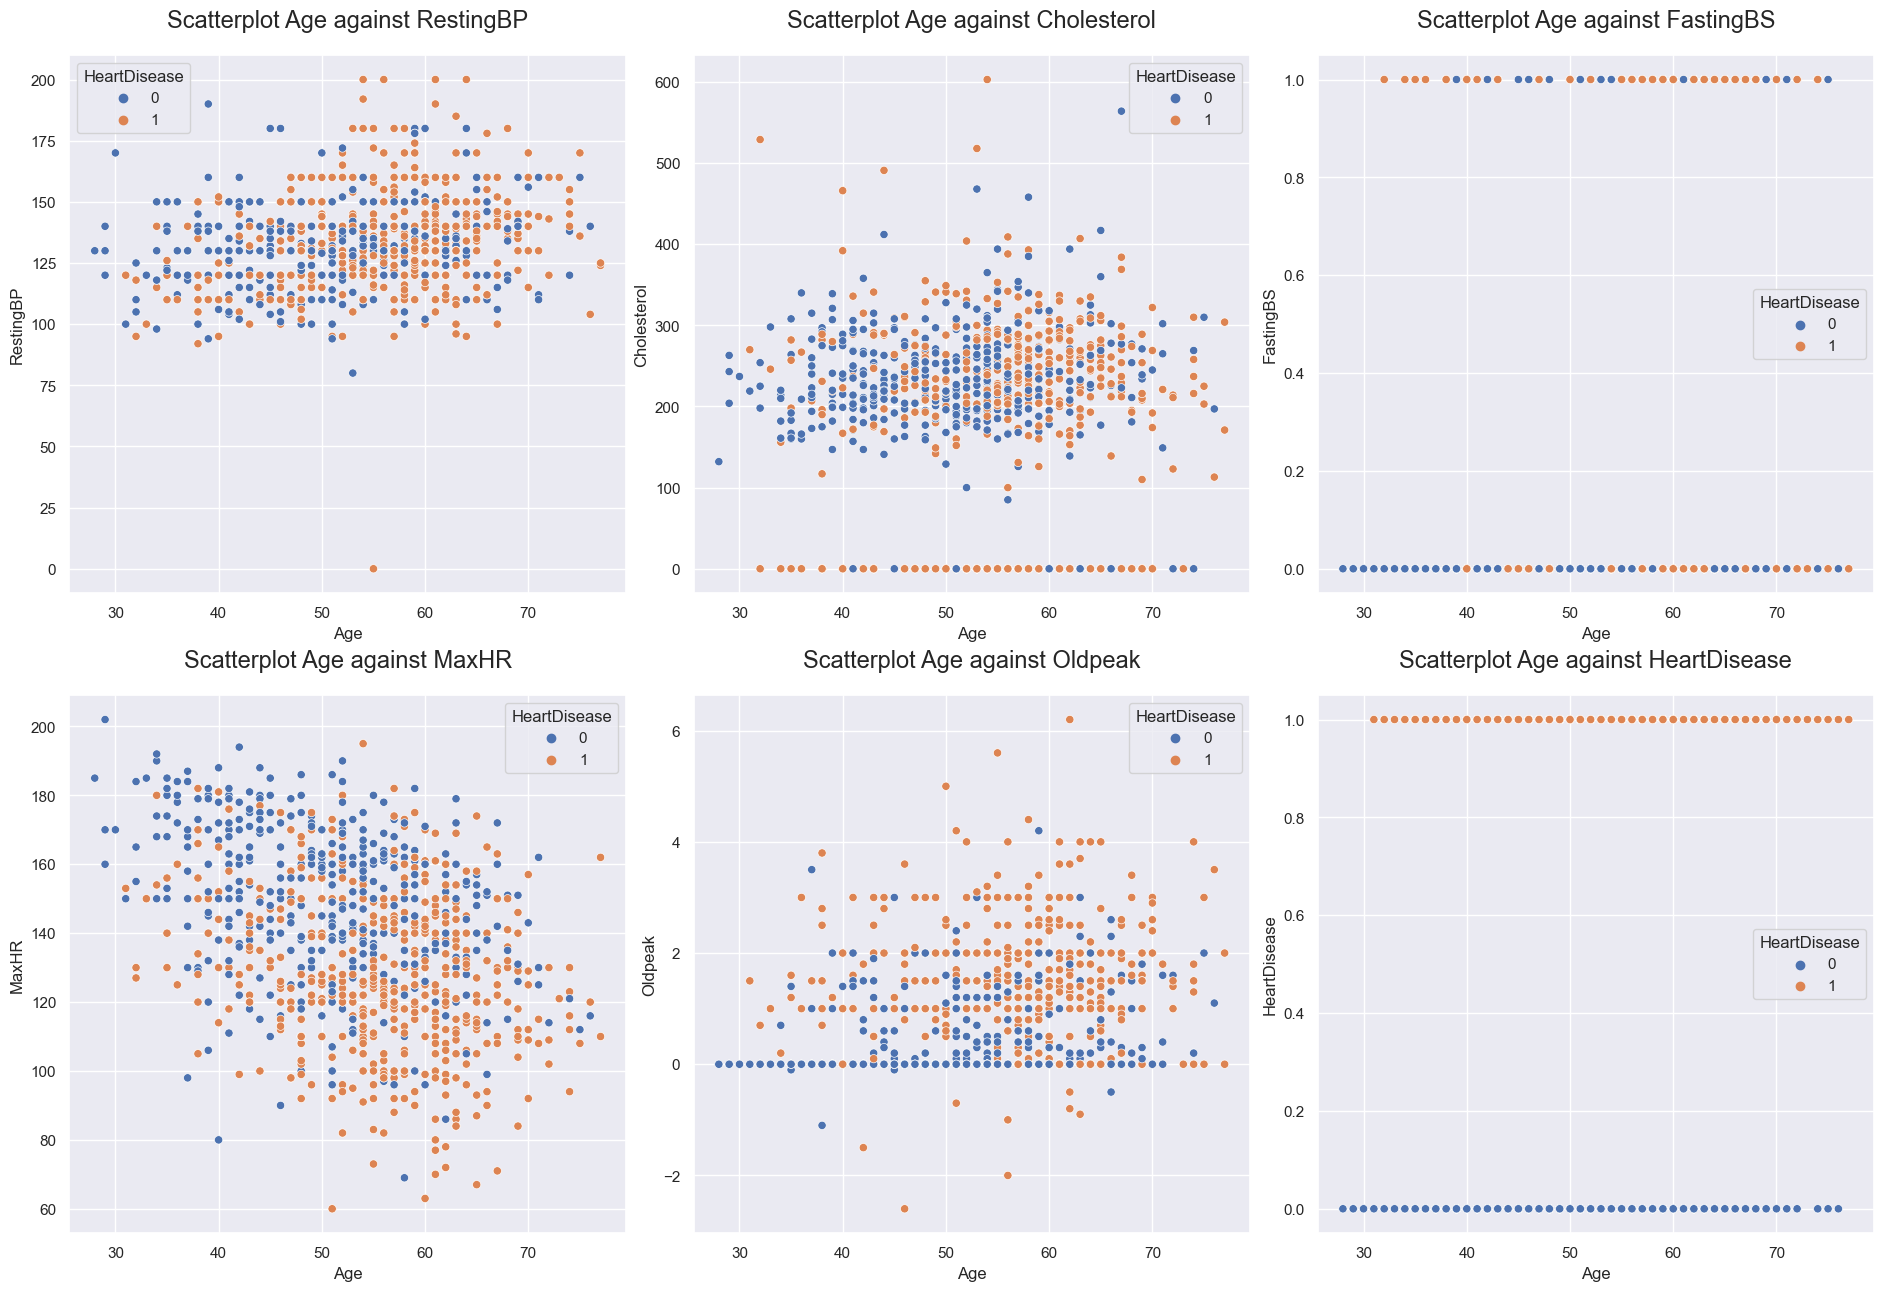

In [45]:
#scatterplot
plt.figure(figsize=(19,19))

#removing age
num_cols.remove('Age')
for idx, col in enumerate(num_cols):
    plt.subplot(3,3, idx+1)

    sns.scatterplot(
        x='Age',
        y=train_data[col],
        data=train_data,
        hue='HeartDisease'
    )

    plt.title(f'Scatterplot Age against {col}', pad=20, fontsize=17)
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5)

plt.show()



#### <b> <a id='7' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Outlier Detection</a><b>

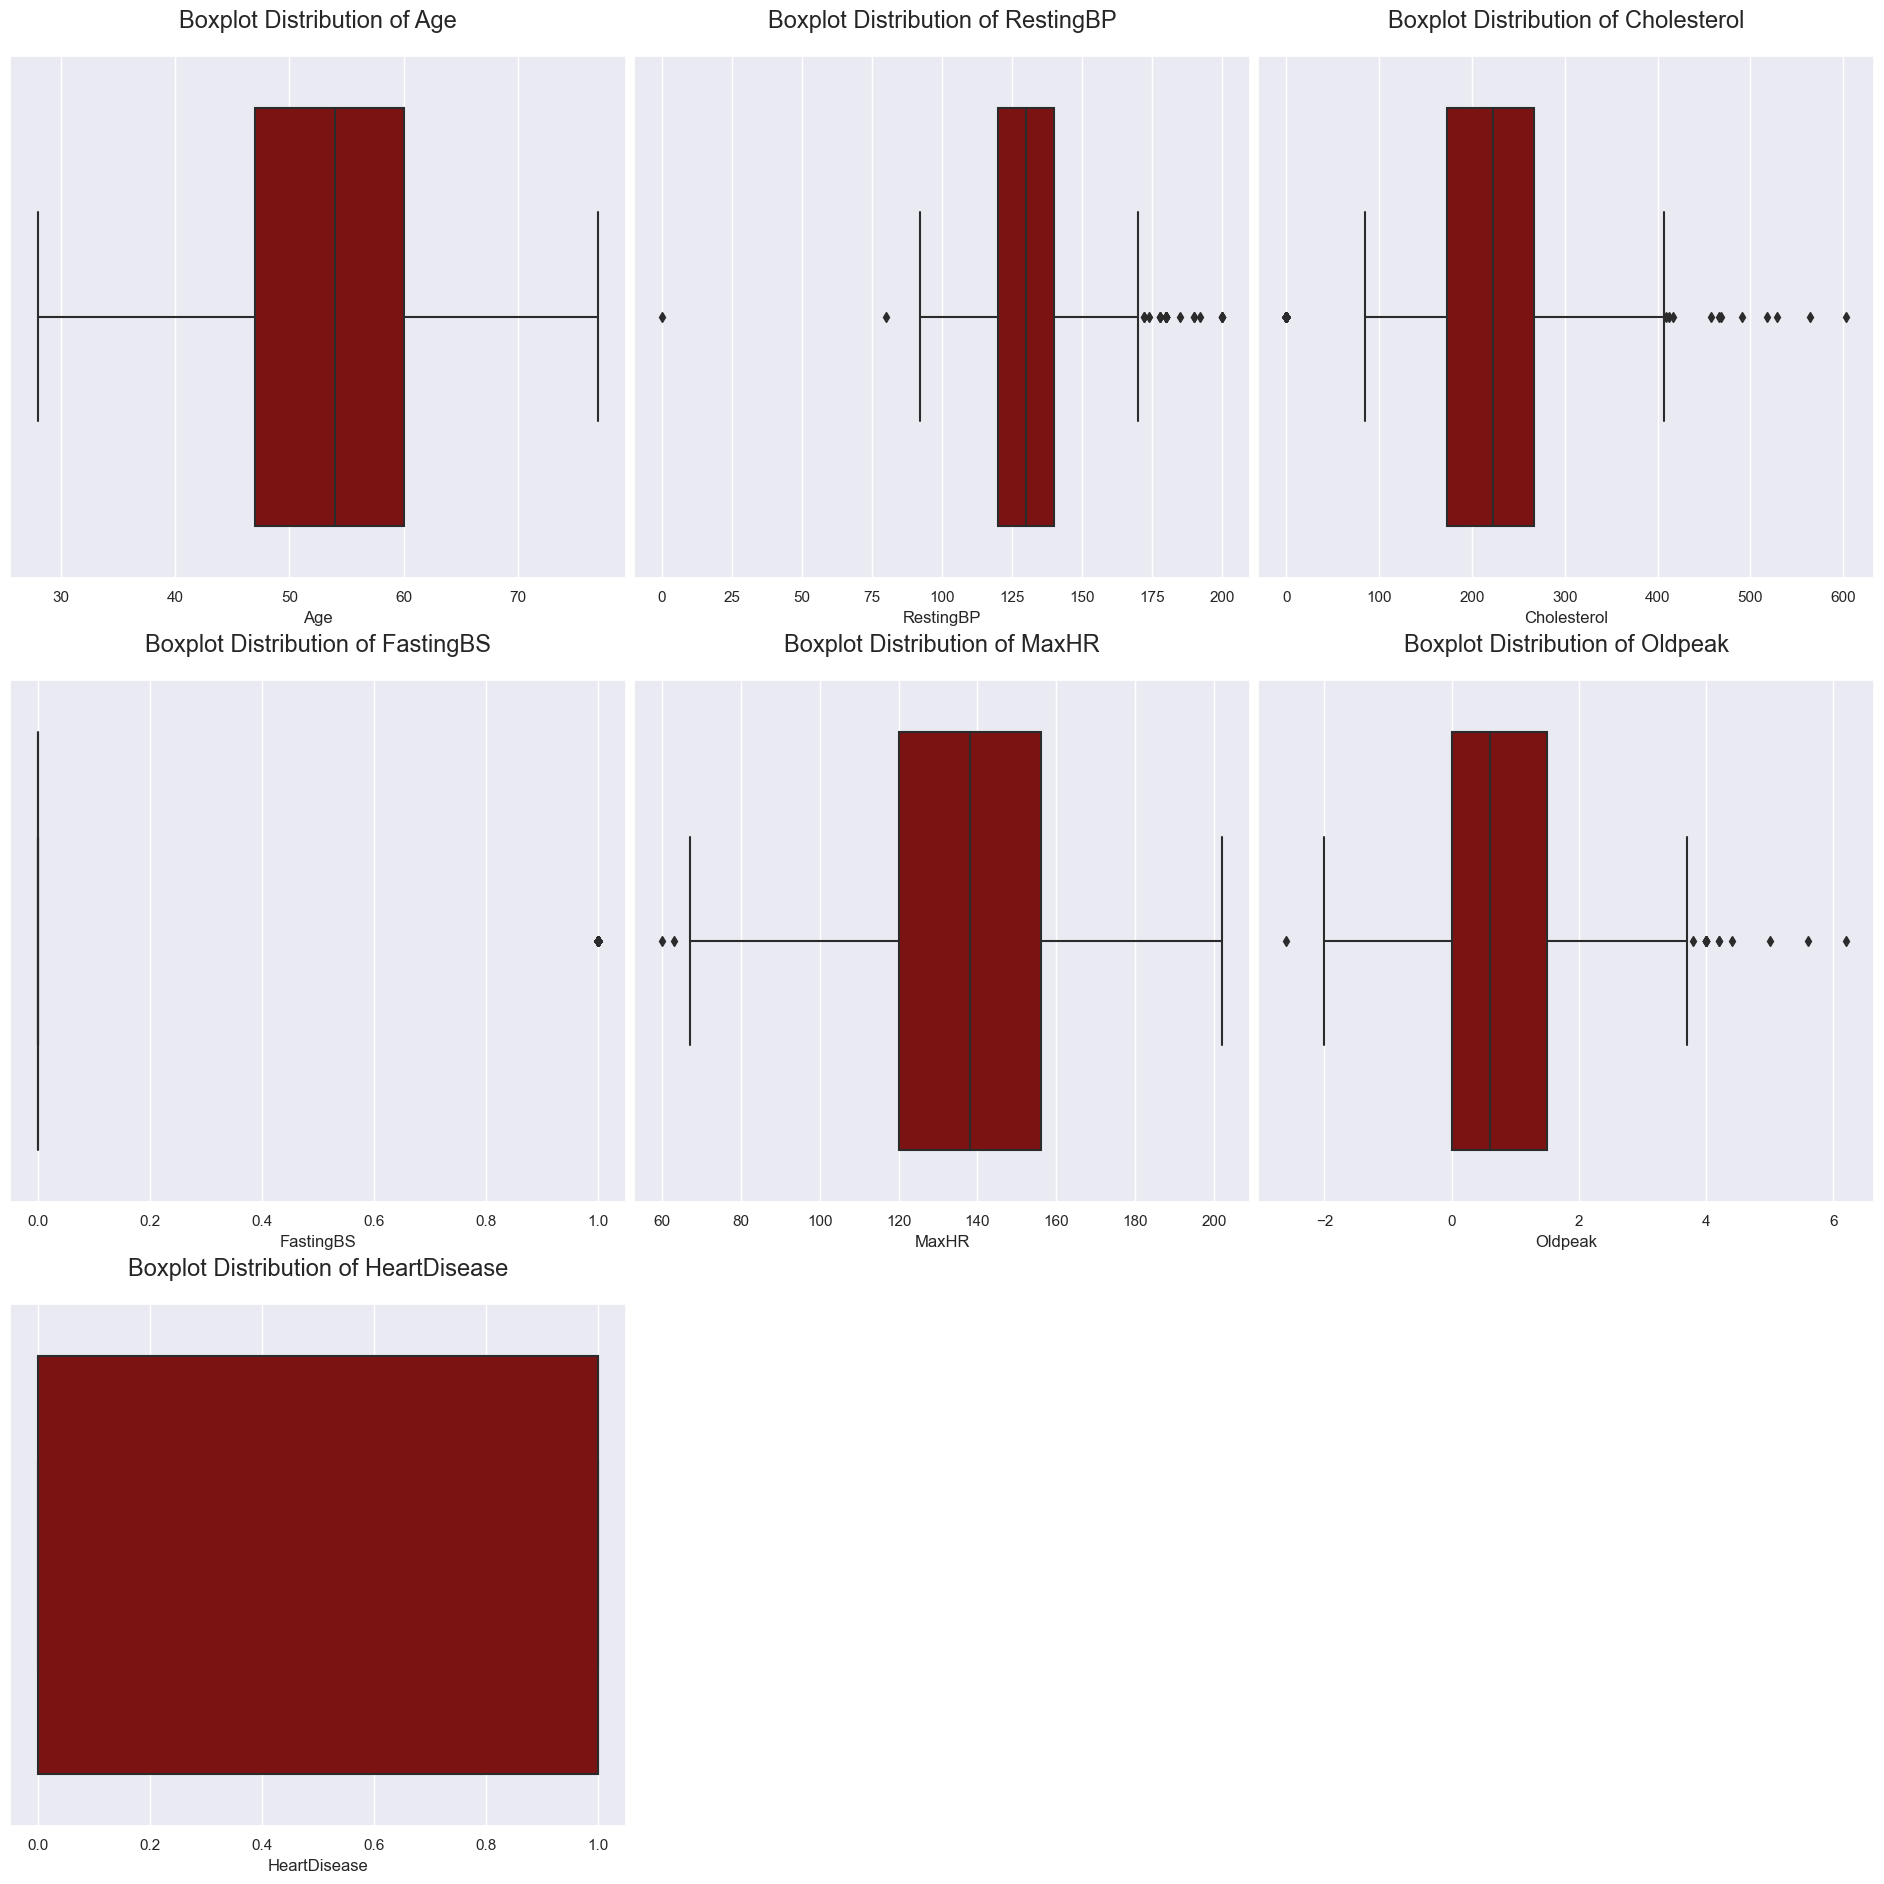

In [46]:
#selecting numerical columns
num_cols = train_data.select_dtypes(exclude='object').columns.to_list()

#boxplot
plt.figure(figsize=(19,19))
colors =  ['#8e0201', '#e8cccc']

for idx, col in enumerate(num_cols):
    plt.subplot(3,3, idx+1)

    sns.boxplot(
        x=train_data[col],
        data=train_data,
        palette=colors
    )

    plt.title(f'Boxplot Distribution of {col}', pad=20, fontsize=17)
    plt.tight_layout(h_pad=0.5, w_pad=0.5)

plt.show()

In [47]:
train_data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [48]:
columns_with_outliers = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for idx, val in enumerate(columns_with_outliers):
     # Find the 10th and 90th percentile values
    tenth_percentile = train_data[val].quantile(0.10)
    ninetieth_percentile = train_data[val].quantile(0.90)

    # Replace outliers with the 10th or 90th percentile value
    train_data[val] = train_data[val].apply(
        lambda x: tenth_percentile if x <=tenth_percentile else ninetieth_percentile if x > ninetieth_percentile else x
    ) 

#### <b> <a id='8' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Correlation Matrix</a><b>

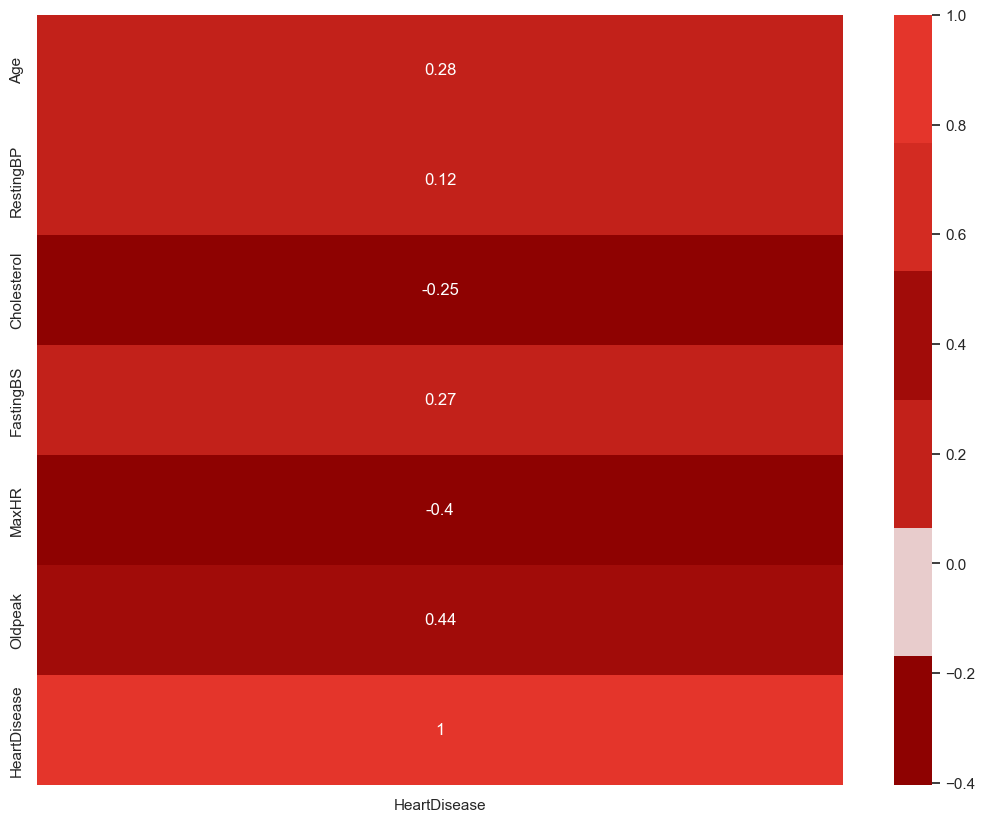

In [49]:
#checing the correlation of the features with the target 
corr_target = train_data.corr(numeric_only=True)[['HeartDisease']]

plt.figure(figsize=(13,10))
colors = ['#8e0201','#e8cccc', '#c2211a',  '#a10c09', '#d32b22', '#e4352b']
sns.heatmap(corr_target, annot=True, cmap=colors)
plt.show()

<Axes: >

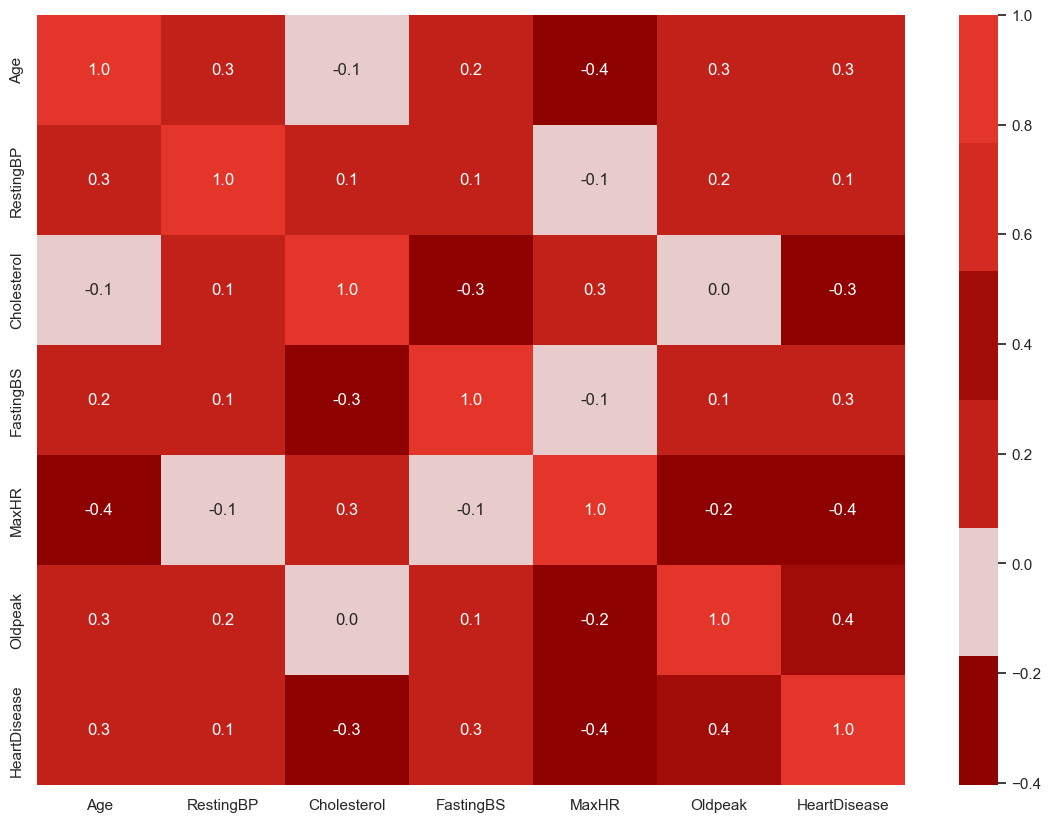

In [50]:
#overall correaltion matrix
plt.figure(figsize=(14,10))
sns.heatmap(
    train_data.corr(numeric_only=True), annot=True, cmap=colors, fmt='.1f'
)

#### <b> <a id='9' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Data Splitting, Scaling</a><b>

In [196]:
#making a copy 
final_df = train_data.copy()

In [197]:
#features
X= final_df.drop(['HeartDisease'], axis=1)
#target
y= final_df['HeartDisease']

In [198]:
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()
num_cols = X.select_dtypes(exclude='object').columns.to_list()

In [199]:
encoder = LabelEncoder()
for idx, col in enumerate(cat_cols):
    X[col]= encoder.fit_transform(X[col])

In [201]:
scaler = MinMaxScaler()
for idx, col in enumerate(num_cols):
    X[col]= scaler.fit_transform(X[[col]])

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [204]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((734, 11), (734,), (184, 11), (184,))

#### <b> <a id='10' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Model Building & Evaluation</a><b>

In [205]:
def model_evaluation(model):
    #training the model
    model.fit(X_train, y_train)

    #making predictions
    y_pred =model.predict(X_test)

    #classification report
    report = classification_report(y_pred, y_test)


    print(f'Name:{model}')
    print('--'*20,'Report based on Validation Test', '--'*20)
    print(report)
    print(report[0])
    print('\n')

In [206]:
#models
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
}

In [207]:
for name, model in models.items():
    model_evaluation(model)

Name:LogisticRegression()
---------------------------------------- Report based on Validation Test ----------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        88
           1       0.81      0.91      0.86        96

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

 


Name:KNeighborsClassifier()
---------------------------------------- Report based on Validation Test ----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        84
           1       0.88      0.94      0.91       100

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184

 


Name:SVC()
---------------------------------------- Repo

Inferences:
1. The KNeighbors Model had the highest Accuracy, Precison , Recall and F1 Score.
2. The SVM  had the second best Accurcy, Precision , Recall and F1 Socre.
3. The Logistic Regresssion  model came in third for both Accurcy, Precision , Recall and F1 Socre.
4. The Decision Tree model performed poorly in all areas.
5. We will perform Hypeparameter Tuning on the KNeighbors Model.

#### <b> <a id='11' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'> Hyperparameter Tuning</a><b>

In [217]:
param_grid = {
    'n_neighbors': list(range(1, 50, 12)),
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]
}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Create a KFold object for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a RandomizedSearchCV object
grid_search = GridSearchCV(knn, param_grid=param_grid, scoring='accuracy', cv=kfold)

# Fit the RandomizedSearchCV object to the data
grid_search.fit(X_train, y_train)

best = grid_search.best_params_
# Print the best parameters found
print("Best Parameters:", best)

# Print the best score found
print("Best Score:", grid_search.best_score_)

#making predictions
y_pred=grid_search.predict(X_test)

report= classification_report(y_pred, y_test)

print('Report', report)

Best Parameters: {'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
Best Score: 0.8664150591743548
Report               precision    recall  f1-score   support

           0       0.90      0.81      0.85        85
           1       0.85      0.92      0.88        99

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Inferences:
1. The Optimized model got an accuracy score of 0.87. It correctly classified 87% of each class.
2. The model had a very high precision in classify both classes and a relatively high recall too.
3. The F1 score for both class a very high which means there is a steady balance between sensistivy and precision.

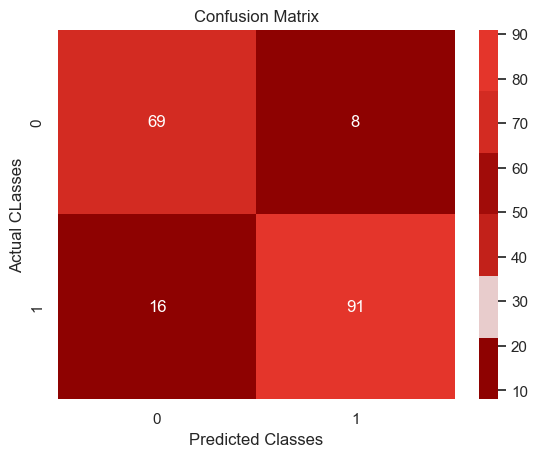

In [218]:
#confusion matrix
matrix = confusion_matrix(y_test, y_pred)

#plotting the matrix

sns.heatmap(matrix, annot=True, cmap=colors, fmt='g')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual CLasses')
plt.title('Confusion Matrix')

plt.show()

Inferences:
1. The Model Correctly classified 69 classess as True Negative and 91 classes are True Positive
2. The Model Incorreclty classifed 8 classes as a Positive (False Positve) and 16 classes are Negative (False Negatve).

#### <b> <a id='12' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Final Model ROC Plot</a><b>

Text(0, 0.5, 'True Positive Rate')

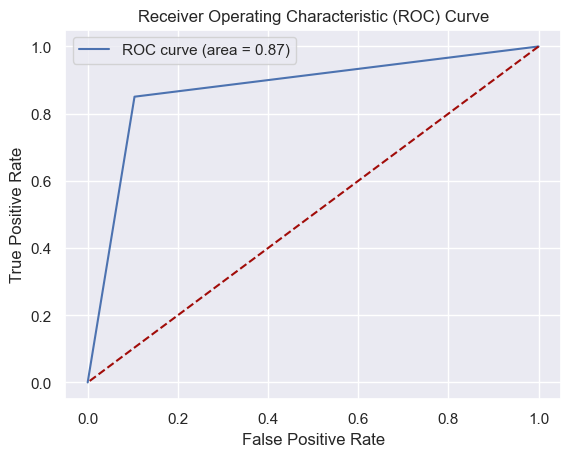

In [219]:
#roc curve

fpr, tpr , threshold = roc_curve(y_test, y_pred)

auc_score= auc(fpr, tpr) 


#displaying the roc curve

sns.lineplot(
    x=fpr, y=tpr, palette=colors[2]
)
plt.plot([1,0], [1,0], linestyle='--', color=colors[3])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc_score])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


Inference:
1. The Receiver Operating Characteristic (ROC) Curve Area for the SVM Model is 0.87 which is really good.

#### <b> <a id='13' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Model Saving</a><b>

In [221]:
#saving the model
import joblib
joblib.dump(grid_search, 'Heart-Disease-predictor.joblib')

['Heart-Disease-predictor.joblib']

#### <b> <a id='14' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Predictive System</a><b>

In [223]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,1,1,0.60,0.947541,0.0,1,1.000000,0,0.000000,2
1,0.428571,0,2,1.00,0.590164,0.0,1,0.791045,0,0.434783,1
2,0.183673,1,1,0.40,0.927869,0.0,2,0.000000,0,0.000000,2
3,0.408163,0,0,0.56,0.701639,0.0,1,0.074627,1,0.652174,1
4,0.530612,1,2,0.80,0.639344,0.0,1,0.283582,0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.00,0.865574,0.0,1,0.432836,0,0.521739,1
914,0.816327,1,0,0.68,0.632787,1.0,1,0.567164,0,1.000000,1
915,0.591837,1,0,0.40,0.429508,0.0,1,0.179104,1,0.521739,1
916,0.591837,0,1,0.40,0.773770,0.0,0,1.000000,0,0.000000,1


In [224]:
#building a predictive system
features = (40,140, 289, 0, 172, 0, 1, 1, 1,0,2 )

input_data = np.array(features).reshape(1,-1)

predictor = joblib.load('Heart-Disease-predictor.joblib')

prediction = predictor.predict(input_data)


output = ['Patient has no Sign of Heart Disease' if prediction[0] == 0 else 'Patient has Heart Disease']
print(f'The System Predicts {output[0]}')

The System Predicts Patient has no Sign of Heart Disease


#### <b> <a id='14' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Conclusion</a><b>

Leveraging Machine Learning Algorithms like KNeighbors, Logistic Regression and Support Vector Machine to classify Heart Disease based on several Features. It emerged that KNeighbors had the most accurate predictions of each model.